In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifft, fft, fftfreq
%matplotlib inline

In [20]:
# Importo el archivo directamente desde la url.
file_1 = np.genfromtxt('https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesDatos/master/hands_on/solar/monthrg.dat')
year_1 = file_1[:,0] 
month_1 = file_1[:,1]
day_1 = file_1[:,2]
mean_1 = file_1[:,3]

# Nos importan solo los que tengan días distintos de cero.
year = []
month = []
mean = []
for i in range(len(day_1)):
    if(day_1[i]!=0):
        year.append(year_1[i])
        month.append(month_1[i])
        mean.append(mean_1[i])

# Queremos tener el año como decimal, así que incluyo el decimal del mes correspondiente en cada uno de los datos.
year = [year[i] + month[i]/12. for i in range(len(year))]

In [53]:
len(year), year[2988]

(4141, 1900.0)

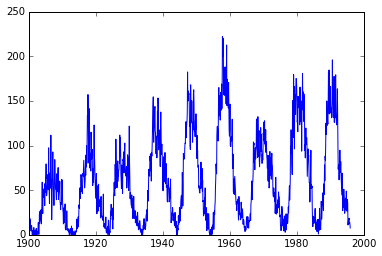

In [54]:
plt.plot(year[2988:],mean[2988:])

In [78]:
# Cálculo de la transformada de Fourier
mean_fou = fft(mean)
frequency = fftfreq(len(year), 1./12.)

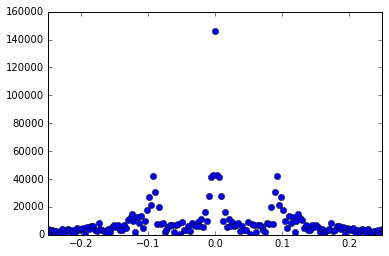

In [79]:
plt.plot(frequency,np.abs(mean_fou),'o')
plt.xlim(-0.25,0.25)
plt.show()

In [80]:
mean_fou[np.abs(frequency) >= 0.2 ] = 0

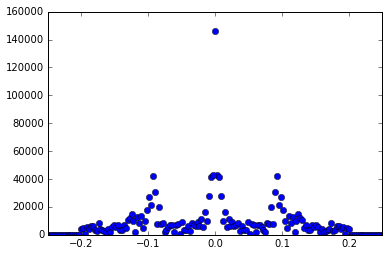

In [81]:
plt.plot(frequency,np.abs(mean_fou),'o')
plt.xlim(-0.25,0.25)
plt.show()

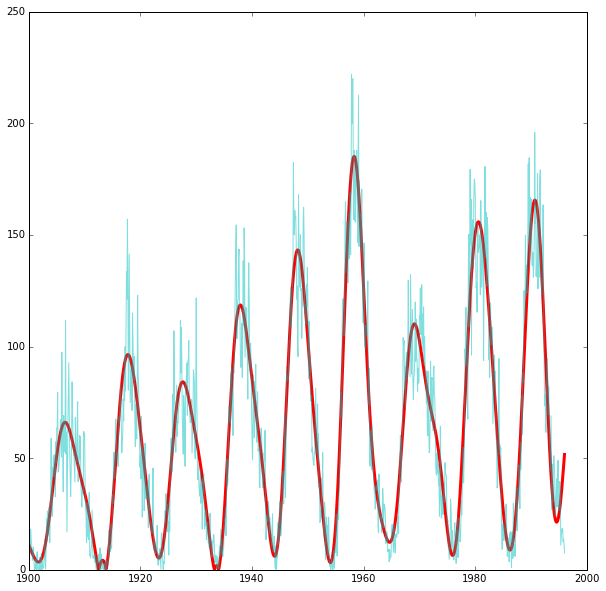

In [94]:
filter_mean = ifft(mean_fou)

plt.figure(figsize=(10,10))
plt.plot(year[2988:],np.abs(filter_mean[2988:]),'r',linewidth=3.)
plt.plot(year[2988:],mean[2988:],'c',alpha=0.5)
plt.show()

In [166]:
max_mean = max(np.abs(mean_fou)[frequency>0.1])

In [167]:
index = 0
for i in range(len(mean_fou[frequency>0.1])):
    if(np.abs(mean_fou[frequency>0.1][i])==max_mean):
        index = i

In [165]:
1/frequency[index]

/home/aha-el-capi/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


inf

In [168]:
index

0